In [ ]:
#Code for k means cluster


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load data
df = pd.read_csv("india-districts-census-2011.csv")

# Keep IDs for interpretation
id_cols = ["State name", "District name"]

# Denominator
base = "Households"

# 2. Count columns to turn into percentages
core_counts = [
    "Housholds_with_Electric_Lighting",
    "Main_source_of_drinking_water_Tapwater_Households",
    "Having_latrine_facility_within_the_premises_Total_Households",
    "Having_bathing_facility_Total_Households",
    "Households_with_separate_kitchen_Cooking_inside_house",
    "LPG_or_PNG_Households",
    "Households_with_Computer",
    "Households_with_Internet",
    "Households_with_Television",
    "Households_with_Telephone_Mobile_Phone",
    "Condition_of_occupied_census_houses_Dilapidated_Households",
    "Households_with_Car_Jeep_Van",
    "Households_with_Scooter_Motorcycle_Moped",
]

# 3. Create percentage features
for c in core_counts:
    df[c + "_pct"] = df[c] / df[base]

features = [c + "_pct" for c in core_counts]

# 4. Drop rows with missing values in chosen features
df_model = df[id_cols + features].dropna().reset_index(drop=True)

X = df_model[features].values

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Try different k for K-means and check silhouette score
scores = {} # Initialize dictionary to store silhouette scores
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    scores[k] = sil # Store the silhouette score for each k
    print(f"k={k}, silhouette={sil:.3f}")

# 7. Choose a k based on the above (example: k=3)
best_k = 3
km = KMeans(n_clusters=best_k, random_state=0, n_init="auto")
km_labels = km.fit_predict(X_scaled)

df_model["cluster_kmeans"] = km_labels

# 8. Cluster-wise mean of each feature (interpretation)
cluster_summary_kmeans = df_model.groupby("cluster_kmeans")[features].mean()
print(cluster_summary_kmeans)

# Optional: how many districts in each cluster
print(df_model["cluster_kmeans"].value_counts())

k=2, silhouette=0.326
k=3, silhouette=0.290
k=4, silhouette=0.205
k=5, silhouette=0.168
k=6, silhouette=0.164
                Housholds_with_Electric_Lighting_pct  \
cluster_kmeans                                         
0                                           0.320627   
1                                           0.673593   
2                                           0.615837   

                Main_source_of_drinking_water_Tapwater_Households_pct  \
cluster_kmeans                                                          
0                                                        0.149120       
1                                                        0.503980       
2                                                        0.429154       

                Having_latrine_facility_within_the_premises_Total_Households_pct  \
cluster_kmeans                                                                     
0                                                        0.220948          

k=2, silhouette=0.326
k=3, silhouette=0.290
k=4, silhouette=0.205
k=5, silhouette=0.168
k=6, silhouette=0.164
k=7, silhouette=0.185


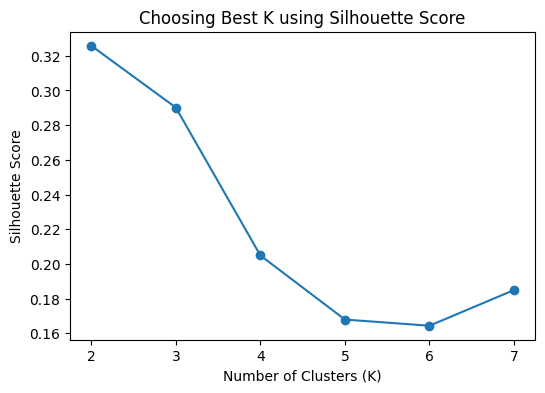

In [ ]:
#Silhouette Score graph for K means

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = {}  # dictionary to store K and silhouette score

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    scores[k] = sil
    print(f"k={k}, silhouette={sil:.3f}")

# Now plot the dictionary
plt.figure(figsize=(6, 4))
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Choosing Best K using Silhouette Score")
plt.show()


In [ ]:
best_k = max(scores, key=scores.get)
print(f"Best K = {best_k}, silhouette = {scores[best_k]:.3f}")


Best K = 2, silhouette = 0.326


In [ ]:
#Spectral clustering without Silhouette Score

from sklearn.cluster import SpectralClustering

# Use the same best_k as K-means as a starting point
sc = SpectralClustering(
    n_clusters=best_k,
    affinity="rbf",      # Gaussian kernel similarity
    assign_labels="kmeans",
    random_state=0
)

spec_labels = sc.fit_predict(X_scaled)

df_model["cluster_spectral"] = spec_labels

# Cluster-wise averages for spectral clustering
cluster_summary_spec = df_model.groupby("cluster_spectral")[features].mean()
print(cluster_summary_spec)

print(df_model["cluster_spectral"].value_counts())

                  Housholds_with_Electric_Lighting_pct  \
cluster_spectral                                         
0                                             0.472801   
1                                             0.762644   

                  Main_source_of_drinking_water_Tapwater_Households_pct  \
cluster_spectral                                                          
0                                                          0.294044       
1                                                          0.660920       

                  Having_latrine_facility_within_the_premises_Total_Households_pct  \
cluster_spectral                                                                     
0                                                          0.327852                  
1                                                          0.713004                  

                  Having_bathing_facility_Total_Households_pct  \
cluster_spectral                                       

In [ ]:
#Spectral clustering with Silhouette Score

from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# ============================================================
# ⚙️ Spectral Clustering
# ============================================================
sc = SpectralClustering(
    n_clusters=best_k,     # use your best_k (e.g., 2 or 3)
    affinity="rbf",        # Gaussian kernel similarity
    assign_labels="kmeans",
    random_state=0
)

# Fit and predict
spec_labels = sc.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_model["cluster_spectral"] = spec_labels

# ============================================================
# 📈 Silhouette Score
# ============================================================
score = silhouette_score(X_scaled, spec_labels)
print(f"\nSilhouette Score (Spectral Clustering): {score:.3f}")

# ============================================================
# 📋 Cluster Summary
# ============================================================
cluster_summary_spec = df_model.groupby("cluster_spectral")[features].mean()
print("\nCluster-wise Summary (Spectral Clustering):\n")
print(cluster_summary_spec)

print("\nCluster Sizes:\n", df_model["cluster_spectral"].value_counts())



Silhouette Score (Spectral Clustering): 0.568

Cluster-wise Summary (Spectral Clustering):

                  Housholds_with_Electric_Lighting_pct  \
cluster_spectral                                         
0                                             0.472801   
1                                             0.762644   

                  Main_source_of_drinking_water_Tapwater_Households_pct  \
cluster_spectral                                                          
0                                                          0.294044       
1                                                          0.660920       

                  Having_latrine_facility_within_the_premises_Total_Households_pct  \
cluster_spectral                                                                     
0                                                          0.327852                  
1                                                          0.713004                  

                  Having_bat

# New Section

✅ Dataset Loaded Successfully
Shape: (640, 118)

Column Names:
 ['District code', 'State name', 'District name', 'Population', 'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC', 'Male_SC', 'Female_SC', 'ST', 'Male_ST', 'Female_ST', 'Workers', 'Male_Workers', 'Female_Workers', 'Main_Workers', 'Marginal_Workers']

Number of Numeric Columns: 116

✅ Data Scaled Successfully
Shape of Scaled Matrix: (640, 116)


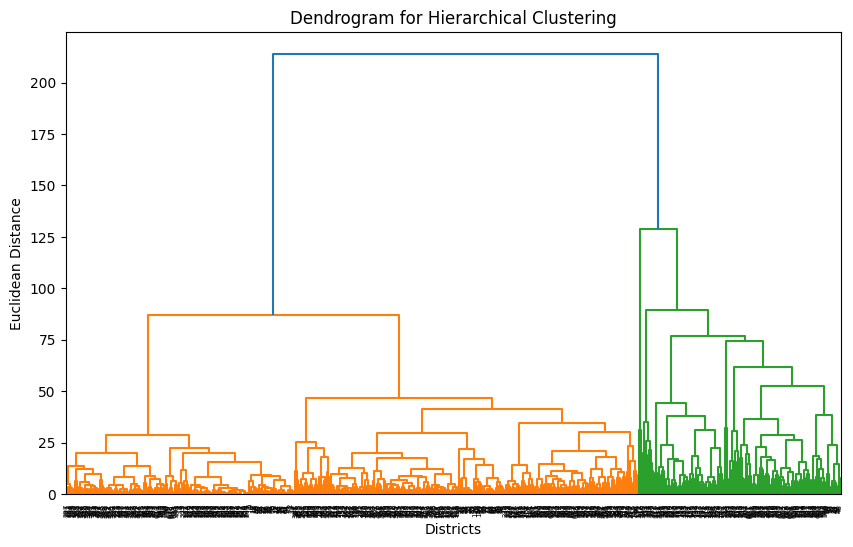


Silhouette Score (Hierarchical Clustering): 0.423


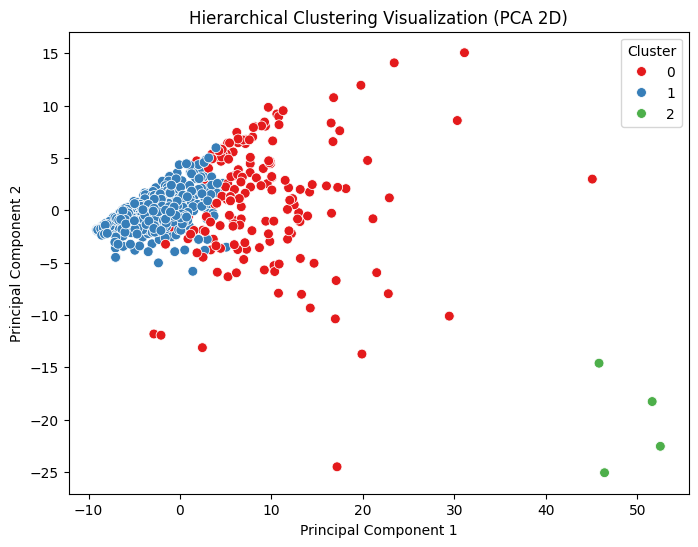

In [ ]:
# ============================================================
# Hierarchical clustering without our selected feature
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# ============================================================
# 📊 Load Dataset
# ============================================================
df = pd.read_csv("india-districts-census-2011.csv")

print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist()[:20])  # Show first 20 columns for preview

# ============================================================
# 🧹 Select Numeric Columns for Clustering
# ============================================================
# Drop non-numeric columns (like district name or state)
df_num = df.select_dtypes(include=[np.number])

print("\nNumber of Numeric Columns:", df_num.shape[1])

# Optional: drop ID columns if they exist
for col in ['id', 'District Code', 'District_ID']:
    if col in df_num.columns:
        df_num = df_num.drop(columns=[col])

# ============================================================
# ⚖️ Standardize the Data
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

print("\n✅ Data Scaled Successfully")
print("Shape of Scaled Matrix:", X_scaled.shape)

# ============================================================
# 🌳 Plot Dendrogram to Determine Optimal Clusters
# ============================================================
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Districts")
plt.ylabel("Euclidean Distance")
plt.show()

# ============================================================
# 🤖 Fit Hierarchical (Agglomerative) Clustering
# ============================================================
# Choose number of clusters based on dendrogram (adjust n_clusters if needed)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

labels = hc.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster_HC'] = labels

# ============================================================
# 📈 Evaluate using Silhouette Score
# ============================================================
score = silhouette_score(X_scaled, labels)
print(f"\nSilhouette Score (Hierarchical Clustering): {score:.3f}")

# ============================================================
# 🎨 Visualize Clusters in 2D using PCA (optional)
# ============================================================
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set1", s=50)
plt.title("Hierarchical Clustering Visualization (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


✅ Dataset Loaded Successfully
Shape: (640, 118)

Column Names:
 ['District code', 'State name', 'District name', 'Population', 'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC', 'Male_SC', 'Female_SC', 'ST', 'Male_ST', 'Female_ST', 'Workers', 'Male_Workers', 'Female_Workers', 'Main_Workers', 'Marginal_Workers']
✅ All selected feature columns found!

✅ Data Scaled Successfully
Shape of Scaled Matrix: (640, 13)


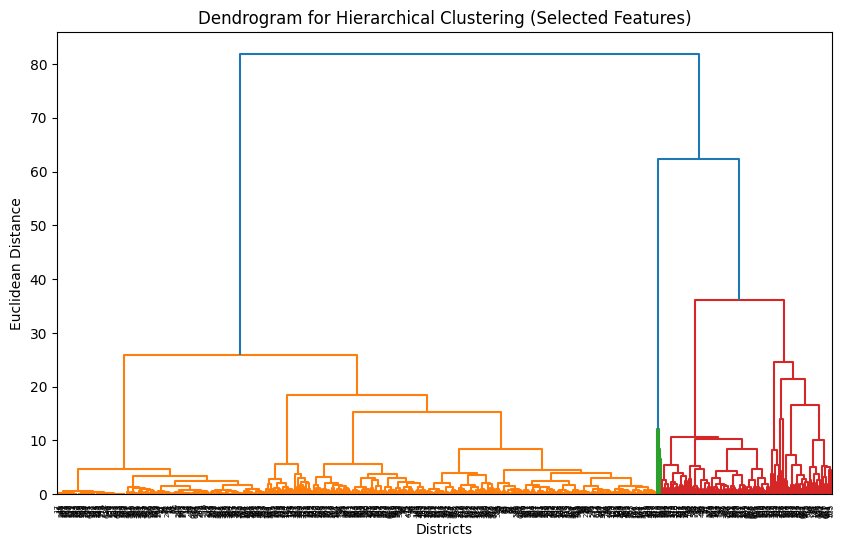


Silhouette Score (Hierarchical Clustering): 0.557


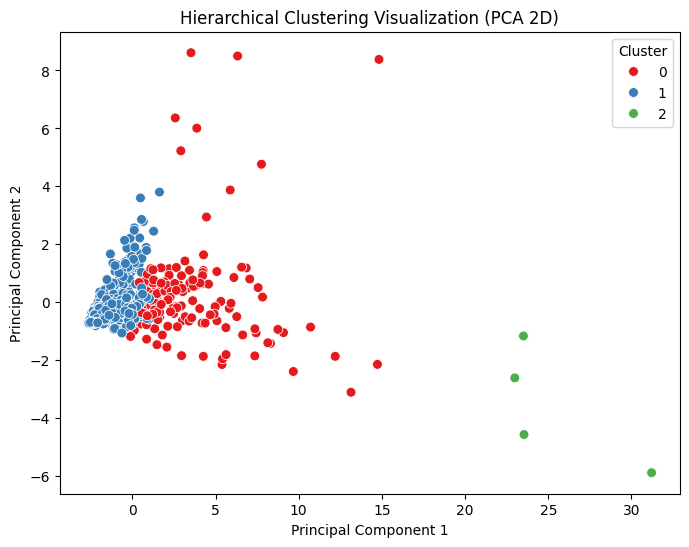


Cluster Summary (Average Feature Values per Cluster):

            Housholds_with_Electric_Lighting  \
Cluster_HC                                     
0                                 613012.284   
1                                 143455.465   
2                                2113026.750   

            Main_source_of_drinking_water_Tapwater_Households  \
Cluster_HC                                                      
0                                                  422487.915   
1                                                   81536.663   
2                                                 1868933.000   

            Having_latrine_facility_within_the_premises_Total_Households  \
Cluster_HC                                                                 
0                                                  448813.397              
1                                                   92791.382              
2                                                 1630758.750            

In [ ]:
# ============================================================
# Hierarchical clustering with our selected feature
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

# ============================================================
# 📊 Load Dataset
# ============================================================
df = pd.read_csv("india-districts-census-2011.csv")

print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist()[:20])  # Show first 20 columns for preview

# ============================================================
# 🧩 Select Only the Required Features
# ============================================================
features = [
    "Housholds_with_Electric_Lighting",
    "Main_source_of_drinking_water_Tapwater_Households",
    "Having_latrine_facility_within_the_premises_Total_Households",
    "Having_bathing_facility_Total_Households",
    "Households_with_separate_kitchen_Cooking_inside_house",
    "LPG_or_PNG_Households",
    "Households_with_Computer",
    "Households_with_Internet",
    "Households_with_Television",
    "Households_with_Telephone_Mobile_Phone",
    "Condition_of_occupied_census_houses_Dilapidated_Households",
    "Households_with_Car_Jeep_Van",
    "Households_with_Scooter_Motorcycle_Moped"
]

# Check all columns exist
missing = [col for col in features if col not in df.columns]
if missing:
    print("⚠️ Warning: These columns are missing from dataset:", missing)
else:
    print("✅ All selected feature columns found!")

# ============================================================
# ⚖️ Standardize the Data
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

print("\n✅ Data Scaled Successfully")
print("Shape of Scaled Matrix:", X_scaled.shape)

# ============================================================
# 🌳 Plot Dendrogram to Determine Optimal Clusters
# ============================================================
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering (Selected Features)")
plt.xlabel("Districts")
plt.ylabel("Euclidean Distance")
plt.show()

# ============================================================
# 🤖 Fit Hierarchical (Agglomerative) Clustering
# ============================================================
# Choose number of clusters based on dendrogram (adjust n_clusters if needed)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster_HC'] = labels

# ============================================================
# 📈 Evaluate using Silhouette Score
# ============================================================
score = silhouette_score(X_scaled, labels)
print(f"\nSilhouette Score (Hierarchical Clustering): {score:.3f}")

# ============================================================
# 🎨 Visualize Clusters in 2D using PCA
# ============================================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set1", s=50)
plt.title("Hierarchical Clustering Visualization (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# ============================================================
# 📋 Cluster Summary (Average of Each Feature per Cluster)
# ============================================================
cluster_summary = df.groupby('Cluster_HC')[features].mean().round(3)
print("\nCluster Summary (Average Feature Values per Cluster):\n")
print(cluster_summary)
